In [16]:
import pickle
import numpy as np
from stock_energy.missingprocessor import Processor, MissingProcessor
import pandas as pd

with open("./data/copper.pkl", 'rb') as file:
        ori_data = pickle.load(file)

timegan_synth = pd.read_csv("../Copper/gen_data_1.csv", sep = ",")
with open("../stock_result/copper/data1", 'rb') as file:
        gen_data = pickle.load(file)


In [17]:
gen_data = np.array(gen_data)
gen_data.shape

(23, 15, 15)

In [10]:
timegan_synth = np.array(timegan_synth)
timegan_synth.shape

(37, 15)

In [18]:
ori_data = np.array(ori_data['train_set']['dyn'].content)
ori_data.shape

(23, 15, 15)

In [19]:
# save the np.arrays to use for the older tensorflow
np.save('gen_data1.npy', gen_data)
np.save('ori_data.npy', ori_data)

#  Reverse transform the synthetic data into pd dataframe as original

In [20]:
from fastNLP import DataSet
from stock_energy.missingprocessor import Processor
import pandas as pd

data_path = "../TimeGAN_PytorchRebuild/data/copper_data.csv"
df = pd.read_csv(data_path, sep = ",")
types = ["continuous" for i in range(len(df.columns))]
P = Processor(types)
df = P.fit_transform(df)
# df = df[::-1]
gen_dataset = DataSet({"seq_len": [15] * len(gen_data), "dyn": gen_data, "sta":[0]*len(gen_data)})
reconstructed_ori_data = []
for i, chunk in enumerate(gen_dataset['dyn']):
        if i == 0:
            # Add the first chunk entirely
            reconstructed_ori_data.extend(chunk)
        else:
            # Add only the last element of each chunk to avoid duplicates
            reconstructed_ori_data.append(chunk[-1])

# reconstructed_ori_data = reconstructed_ori_data[::-1]
reconstructed_ori_data = P.inverse_transform(np.array(reconstructed_ori_data))
reconstructed_ori_data.to_csv('RTSGAN_gen_data.csv', index= False)
# reconstructed_ori_data

SUM 1 None continuous
Φούρνος Προθέρμανσης 1 καύσης Φ.Α. 1 None continuous
Φούρνος Προθέρμανσης 2 καύσης Φ.Α. 1 None continuous
Φούρνοι Προθέρμανσης 1-2 καύσης Φ.Α. 1 None continuous
Επαγωγικός Φούρνος Προθέρμανσης 1 None continuous
Μηχανισμός αφαίρεσης οξειδίων πριν τη διέλαση 1 None continuous
Κύριο σώμα μηχανισμού διέλασης 1 None continuous
Έξοδος διέλασης 1 None continuous
Υδραυλικές Αντλίες Πρέσας 1 None continuous
Υδραυλικές Αντλίες Πρέσας.1 1 None continuous
Αντλιοστάσιο Πρέσας 1 None continuous
Q_KG (Produced Quantity) 1 None continuous
Q_ST (Produced Pieces) 1 None continuous
MACHMINS (MACHINE MINUTES) 1 None continuous
TOTDH (TOTAL DELAYS -HOURS) 1 None continuous


In [6]:
reconstructed_ori_data

,SUM,Φούρνος Προθέρμανσης 1 καύσης Φ.Α.,Φούρνος Προθέρμανσης 2 καύσης Φ.Α.,Φούρνοι Προθέρμανσης 1-2 καύσης Φ.Α.,Επαγωγικός Φούρνος Προθέρμανσης,Μηχανισμός αφαίρεσης οξειδίων πριν τη διέλαση,Κύριο σώμα μηχανισμού διέλασης,Έξοδος διέλασης,Υδραυλικές Αντλίες Πρέσας,Υδραυλικές Αντλίες Πρέσας.1,Αντλιοστάσιο Πρέσας,Q_KG (Produced Quantity),Q_ST (Produced Pieces),MACHMINS (MACHINE MINUTES),TOTDH (TOTAL DELAYS -HOURS)
0,562721.232308,21378.984806,22235.452362,41536.751735,131759.365341,50425.694764,10471.537006,24797.704570,83306.327478,111601.113438,67433.378625,6.647474e+06,11125.641690,20203.158780,171.235762
1,620029.788463,24322.422528,25048.885025,45880.206931,143003.292697,55984.858545,10250.620482,27246.066039,85089.519693,116004.944358,76775.045582,6.791924e+06,11607.508641,21799.577775,173.230399
2,620219.453602,25649.285657,24854.940613,48275.048075,139690.755342,59231.490168,10626.106918,25080.264094,83917.271777,115346.344815,81203.518772,6.806873e+06,11699.168510,21765.671828,167.917507
3,698387.718559,27903.008776,25958.668376,57460.183464,160392.235500,72300.159806,10643.808701,24895.195067,93684.591973,121392.371556,98581.503025,7.182122e+06,12637.884976,23209.624285,189.808424
4,692849.220903,29242.334478,26058.592760,54143.769643,163639.465347,67109.264528,10882.056025,25089.360359,99721.128475,125659.956554,91121.501049,7.375722e+06,12903.644207,24059.628628,178.383101
5,665465.437684,28486.356066,26160.590930,46275.456657,161789.379507,56460.768187,10706.832053,27177.491276,100354.331498,123848.138883,77906.865005,7.105630e+06,12493.249165,23588.687117,163.670932
6,456931.629772,18096.098674,17169.036532,32270.024841,104429.310710,39045.472782,12164.454301,18538.438609,71210.643650,89583.807186,53747.240287,5.005598e+06,8516.154827,16516.260367,128.152355
7,633326.853818,24709.526878,20806.725266,55486.326210,138939.058492,70237.520376,13293.663784,22412.638876,88070.542667,109624.876680,96611.614280,6.489225e+06,11402.744373,20898.308732,159.698116
8,558992.972917,18863.427238,17482.079124,41612.936444,124853.424312,51062.451549,10020.759718,22339.143109,95458.690185,107822.987291,68276.584342,6.656049e+06,11130.209282,19071.910652,148.109642
9,624737.949375,14551.833850,15707.397330,46804.162708,146155.616121,58888.929970,10663.468400,27383.946424,99789.052568,117233.000143,80226.602222,6.634918e+06,11729.992361,21071.699708,162.660165


In [7]:
# timegan_synth = P.fit_transform(timegan_synth)
# # timegan_synth = timegan_synth[::-1]
# timegan_synth = timegan_synth.reshape(23, 15, 15)
timegan_synth


,SUM,Φούρνος Προθέρμανσης 1 καύσης Φ.Α.,Φούρνος Προθέρμανσης 2 καύσης Φ.Α.,Φούρνοι Προθέρμανσης 1-2 καύσης Φ.Α.,Επαγωγικός Φούρνος Προθέρμανσης,Μηχανισμός αφαίρεσης οξειδίων πριν τη διέλαση,Κύριο σώμα μηχανισμού διέλασης,Έξοδος διέλασης,Υδραυλικές Αντλίες Πρέσας,Υδραυλικές Αντλίες Πρέσας.1,Αντλιοστάσιο Πρέσας,Q_KG (Produced Quantity),Q_ST (Produced Pieces),MACHMINS (MACHINE MINUTES),TOTDH (TOTAL DELAYS -HOURS)
0,562721.232308,21378.984806,22235.452362,41536.751735,131759.365341,50425.694764,10471.537006,24797.704570,83306.327478,111601.113438,67433.378625,6.647474e+06,11125.641690,20203.158780,171.235762
1,620029.788463,24322.422528,25048.885025,45880.206931,143003.292697,55984.858545,10250.620482,27246.066039,85089.519693,116004.944358,76775.045582,6.791924e+06,11607.508641,21799.577775,173.230399
2,620219.453602,25649.285657,24854.940613,48275.048075,139690.755342,59231.490168,10626.106918,25080.264094,83917.271777,115346.344815,81203.518772,6.806873e+06,11699.168510,21765.671828,167.917507
3,698387.718559,27903.008776,25958.668376,57460.183464,160392.235500,72300.159806,10643.808701,24895.195067,93684.591973,121392.371556,98581.503025,7.182122e+06,12637.884976,23209.624285,189.808424
4,692849.220903,29242.334478,26058.592760,54143.769643,163639.465347,67109.264528,10882.056025,25089.360359,99721.128475,125659.956554,91121.501049,7.375722e+06,12903.644207,24059.628628,178.383101
5,665465.437684,28486.356066,26160.590930,46275.456657,161789.379507,56460.768187,10706.832053,27177.491276,100354.331498,123848.138883,77906.865005,7.105630e+06,12493.249165,23588.687117,163.670932
6,456931.629772,18096.098674,17169.036532,32270.024841,104429.310710,39045.472782,12164.454301,18538.438609,71210.643650,89583.807186,53747.240287,5.005598e+06,8516.154827,16516.260367,128.152355
7,633326.853818,24709.526878,20806.725266,55486.326210,138939.058492,70237.520376,13293.663784,22412.638876,88070.542667,109624.876680,96611.614280,6.489225e+06,11402.744373,20898.308732,159.698116
8,558992.972917,18863.427238,17482.079124,41612.936444,124853.424312,51062.451549,10020.759718,22339.143109,95458.690185,107822.987291,68276.584342,6.656049e+06,11130.209282,19071.910652,148.109642
9,624737.949375,14551.833850,15707.397330,46804.162708,146155.616121,58888.929970,10663.468400,27383.946424,99789.052568,117233.000143,80226.602222,6.634918e+06,11729.992361,21071.699708,162.660165


In [ ]:
data_path = "../TimeGAN_PytorchRebuild/data/copper_data.csv"
df = pd.read_csv(data_path, sep = ",")

# PCA and T-SNA

In [14]:
"""Time-series Generative Adversarial Networks (TimeGAN) Codebase.

Reference: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, 
"Time-series Generative Adversarial Networks," 
Neural Information Processing Systems (NeurIPS), 2019.

Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

Last updated Date: April 24th 2020
Code author: Jinsung Yoon (jsyoon0823@gmail.com)

-----------------------------

visualization_metrics.py

Note: Use PCA or tSNE for generated and original data visualization
"""

# Necessary packages
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

   
def visualization(ori_data, generated_data, analysis):
  """Using PCA or tSNE for generated and original data visualization.
  
  Args:
    - ori_data: original data
    - generated_data: generated synthetic data
    - analysis: tsne or pca
  """  
  # Analysis sample size (for faster computation)
  anal_sample_no = min([1000, len(ori_data)])
  idx = np.random.permutation(len(ori_data))[:anal_sample_no]
    
  # Data preprocessing
  ori_data = np.asarray(ori_data)
  generated_data = np.asarray(generated_data)  
  
  ori_data = ori_data[idx]
  generated_data = generated_data[idx]
  
  no, seq_len, dim = ori_data.shape  
  
  for i in range(anal_sample_no):
    if (i == 0):
      prep_data = np.reshape(np.mean(ori_data[0,:,:], 1), [1,seq_len])
      prep_data_hat = np.reshape(np.mean(generated_data[0,:,:],1), [1,seq_len])
    else:
      prep_data = np.concatenate((prep_data, 
                                  np.reshape(np.mean(ori_data[i,:,:],1), [1,seq_len])))
      prep_data_hat = np.concatenate((prep_data_hat, 
                                      np.reshape(np.mean(generated_data[i,:,:],1), [1,seq_len])))
    
  # Visualization parameter        
  colors = ["red" for i in range(anal_sample_no)] + ["blue" for i in range(anal_sample_no)]    
    
  if analysis == 'pca':
    # PCA Analysis
    pca = PCA(n_components = 2)
    pca.fit(prep_data)
    pca_results = pca.transform(prep_data)
    pca_hat_results = pca.transform(prep_data_hat)
    
    # Plotting
    f, ax = plt.subplots(1)    
    plt.scatter(pca_results[:,0], pca_results[:,1],
                c = colors[:anal_sample_no], alpha = 0.2, label = "Original")
    plt.scatter(pca_hat_results[:,0], pca_hat_results[:,1], 
                c = colors[anal_sample_no:], alpha = 0.2, label = "Synthetic")
  
    ax.legend()  
    plt.title('PCA plot')
    plt.xlabel('x-pca')
    plt.ylabel('y_pca')
    plt.show()
    
  elif analysis == 'tsne':
    
    # Do t-SNE Analysis together       
    prep_data_final = np.concatenate((prep_data, prep_data_hat), axis = 0)
    
    # TSNE anlaysis
    tsne = TSNE(n_components = 2, verbose = 1, perplexity = 3, n_iter = 1000)
    tsne_results = tsne.fit_transform(prep_data_final)
      
    # Plotting
    f, ax = plt.subplots(1)
      
    plt.scatter(tsne_results[:anal_sample_no,0], tsne_results[:anal_sample_no,1], 
                c = colors[:anal_sample_no], alpha = 0.2, label = "Original")
    plt.scatter(tsne_results[anal_sample_no:,0], tsne_results[anal_sample_no:,1], 
                c = colors[anal_sample_no:], alpha = 0.2, label = "Synthetic")
  
    ax.legend()
      
    plt.title('t-SNE plot')
    plt.xlabel('x-tsne')
    plt.ylabel('y_tsne')
    plt.show()    

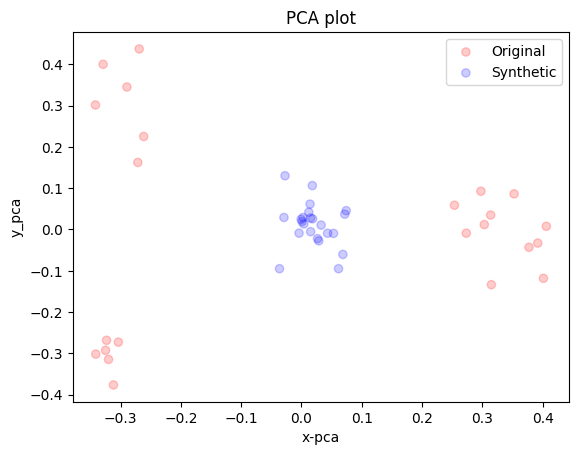

In [15]:
visualization(ori_data, gen_data, 'pca')

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 46 samples in 0.004s...
[t-SNE] Computed neighbors for 46 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 46 / 46
[t-SNE] Mean sigma: 0.167052
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.153061
[t-SNE] KL divergence after 950 iterations: 0.846030


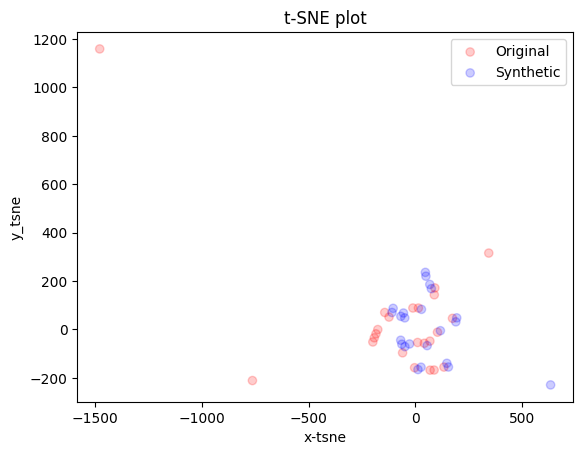

In [8]:
visualization(ori_data, gen_data, 'tsne')

# Visualize the datasets

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

ori = pd.read_csv("../Copper/copper_data.csv", sep = ",")
RTSGAN_synth = pd.read_csv("../Copper/RTSGAN_gen_data.csv", sep = ",")
TIMEGAN_synth = pd.read_csv("../Copper/TimeGAN_synth.csv", sep = ",")

38 38


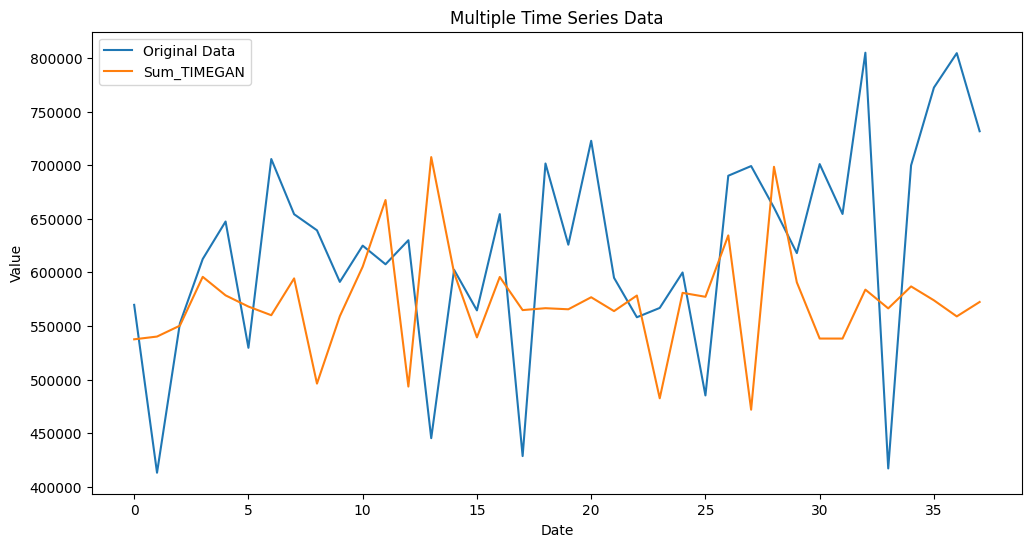

In [25]:
print(len(ori), len(TIMEGAN_synth[76:114]))
plt.figure(figsize=(12, 6))
plt.plot(ori.index, ori['SUM'], label='Original Data')
# plt.plot(RTSGAN_synth.index, RTSGAN_synth['SUM'], label='Synthetic RTSGAN Data')
# plt.plot(TIMEGAN_synth.index, TIMEGAN_synth['SUM'], label='Sum_TIMEGAN')
plt.plot(TIMEGAN_synth[:38].index, TIMEGAN_synth[:38]['SUM'], label='Sum_TIMEGAN')
# plt.plot(TIMEGAN_synth[:38].index, TIMEGAN_synth[38:76]['SUM'], label='Sum_TIMEGAN2')
# plt.plot(TIMEGAN_synth[:38].index, TIMEGAN_synth[76:114]['SUM'], label='Sum_TIMEGAN3')
# Adding title and labels
plt.title('Multiple Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()

# Pearson Correlation and Dynamic Time Warping (DTW)

## Dynamic Time Warping (DTW)

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



c:\Users\steli\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dtw\stepPattern.py:341: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


<Axes: xlabel='Query index', ylabel='Reference index'>

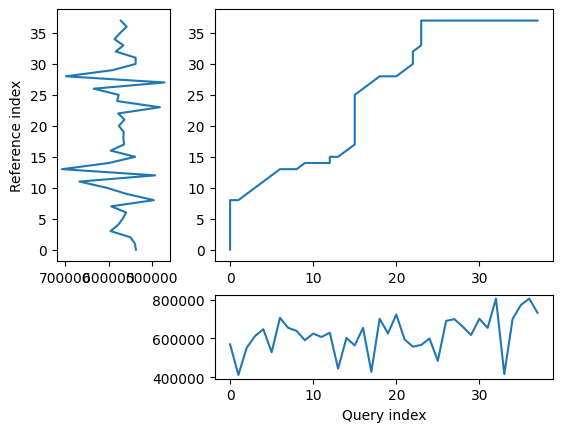

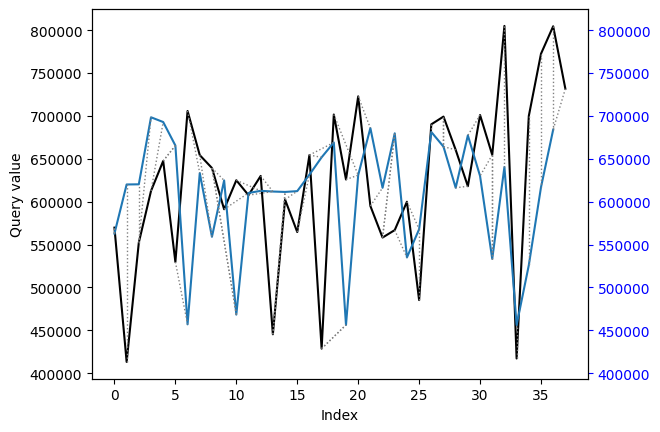

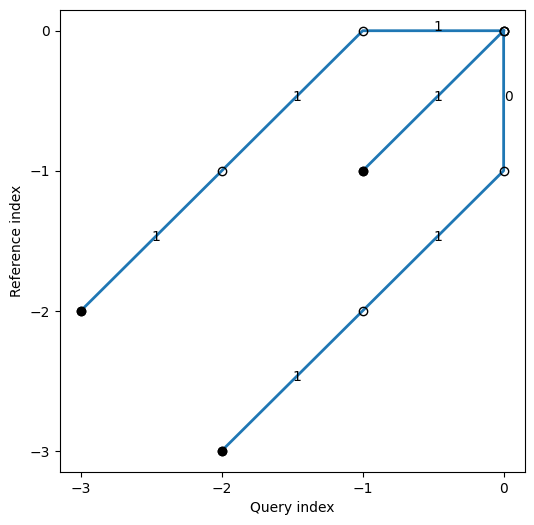

In [20]:
from dtw import *
alignment = dtw(ori['SUM'], TIMEGAN_synth[:38]['SUM'], keep_internals=True)
alignment.plot(type="threeway")
dtw(ori['SUM'], RTSGAN_synth['SUM'], keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

# Pearson Correlation

In [21]:
xy = pd.DataFrame({'x-values': ori['SUM'], 'y-values': TIMEGAN_synth[:38]['SUM']})
corr_matrix = xy.corr()
corr_matrix.at['x-values', 'y-values']

-0.05295942043685259